<a id = Section1></a>
## 1.Introduction 

The __2019-nCoV(virus name)__ is a contagious coronavirus that hailed from __Wuhan__, China. This new strain of virus has striked fear in many countries as cities are quarantined and hospitals are overcrowded. 

- This dataset will help us understand how __2019-nCoV__ is spread aroud the world.

<a id = Section2></a>
## 2. Problem Statement

#### __Question__ : What in this notebook we gonna cover?
- This notebook tracks the __spread__ of the __novel corona virus__, also known as the __2019-nCoV__. It is a contagious respiratory virus that first started in Wuhan in December 2019.

<font color='blue'>__Note:__</font> 

Many great kernels have already been posted (even i am taking help from few of them) but i try to bring the complete visualization into one notebook and make it understand the basic traits of visualization for every reader. 
- My goal is to explore the data in a visual font using the __Plotly__, __Folium__ and animation feature in scatter and geo plots!

- This notebook will be a comparative analysis, the main purpose of which is to examine the differences in the spread of the disease in China and other parts of the world.

<a id = Section3></a>
## 3. Importing libraries

In [133]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Plotting library for Python programming language and it's numerical mathematics extension NumPy
import matplotlib.pyplot as plt
%matplotlib inline

params = {'legend.fontsize': 'large',
          'figure.figsize': (18.5, 10.5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

# Provides a high level interface for drawing attractive and informative statistical graphics
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.figure_factory as ff
from plotly import subplots
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

from datetime import date, datetime,timedelta

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import os

<a id = Section4></a>
## 4. Data Loading and data Description

In [134]:
## The below dataset is the modified version of the originally uploaded initial data
df = pd.read_csv('house_data.csv')

In [135]:
##Looking at data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

| Features | Description |
| :--| :--| 
| **Province-State(PS)** | Target state in the country |
| **Country** | Target Country |
| **Date** | Report Date |
| **Confirmed** | Accumulated number of confirmed 2019-nCoV cases |
| **Recovered** | Accumulated number of recovered 2019-nCoV cases |
| **Deaths** | Accumulated number of deaths due to 2019-nCoV |
| **lat**|Latitude|
| **lon**|Longitude|

What here you see is the pre-processed version of data. Because for this case study our main aim is to show the exploration of data and bringing out a bigger picture.

In [136]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


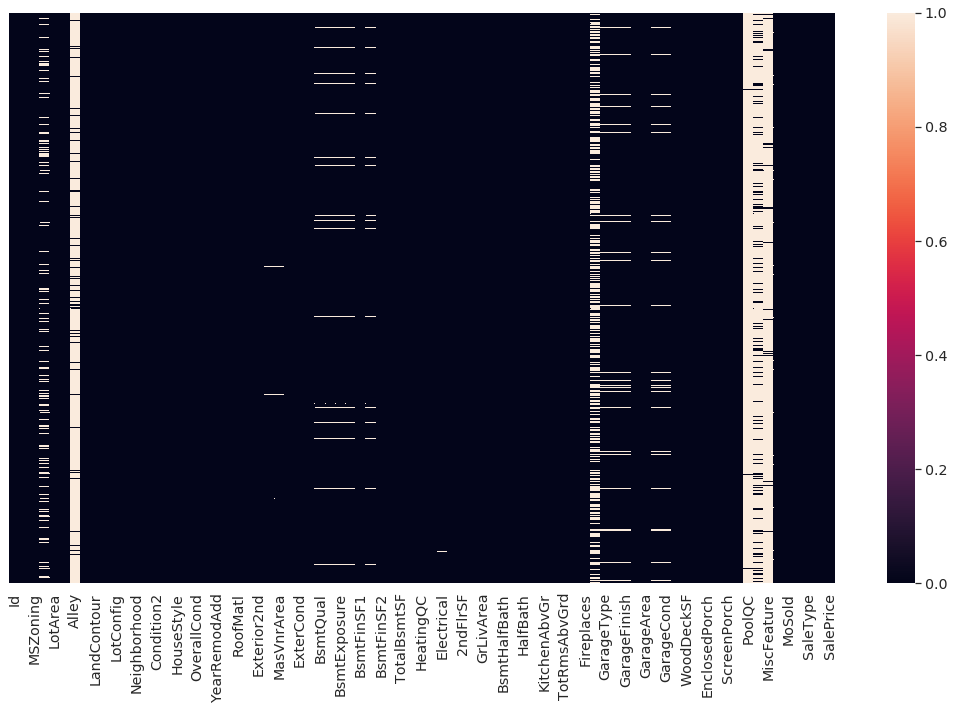

In [137]:
#Checking the heatmap for null values
sns.heatmap(df.isnull(), yticklabels=False)
plt.show()

In [138]:
df.isnull().sum(axis=0).sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [139]:
#Removing columns with maximum missing data
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

## Filling missing data with mean/mode of their respective column

In [140]:
print(df['LotFrontage'].dtype)

float64


In [141]:
print(df['LotFrontage'].mean())
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

70.04995836802665


In [142]:
print(df['GarageType'].dtype)

object


In [143]:
print(df['GarageType'].mode())
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

0    Attchd
dtype: object


In [144]:
print(df['GarageYrBlt'].dtype)

float64


In [145]:
print(df['GarageYrBlt'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

1978.5061638868744


In [146]:
print(df['GarageFinish'].dtype)

object


In [147]:
print(df['GarageFinish'].mode())
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageYrBlt'].mode()[0])

0    Unf
dtype: object


In [148]:
print(df['GarageQual'].dtype)

object


In [149]:
print(df['GarageQual'].mode())
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])

0    TA
dtype: object


In [150]:
print(df['GarageCond'].dtype)

object


In [151]:
print(df['GarageCond'].mode())
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

0    TA
dtype: object


In [152]:
print(df['BsmtFinType2'].dtype)

object


In [153]:
print(df['BsmtFinType2'].mode())
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

0    Unf
dtype: object


In [154]:
print(df['BsmtExposure'].dtype)

object


In [155]:
print(df['BsmtExposure'].mode())
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

0    No
dtype: object


In [156]:
print(df['BsmtFinType1'].dtype)

object


In [157]:
print(df['BsmtFinType1'].mode())
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

0    Unf
dtype: object


In [158]:
print(df['BsmtCond'].dtype)

object


In [159]:
print(df['BsmtCond'].mode())
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

0    TA
dtype: object


In [160]:
print(df['BsmtQual'].dtype)

object


In [161]:
print(df['BsmtQual'].mode())
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

0    TA
dtype: object


In [162]:
print(df['MasVnrType'].dtype)

object


In [163]:
print(df['MasVnrType'].mode())
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

0    None
dtype: object


In [164]:
print(df['MasVnrArea'].dtype)

float64


In [165]:
print(df['MasVnrArea'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

103.68526170798899


In [166]:
print(df['Electrical'].dtype)

object


In [167]:
print(df['Electrical'].mode())
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

0    SBrkr
dtype: object


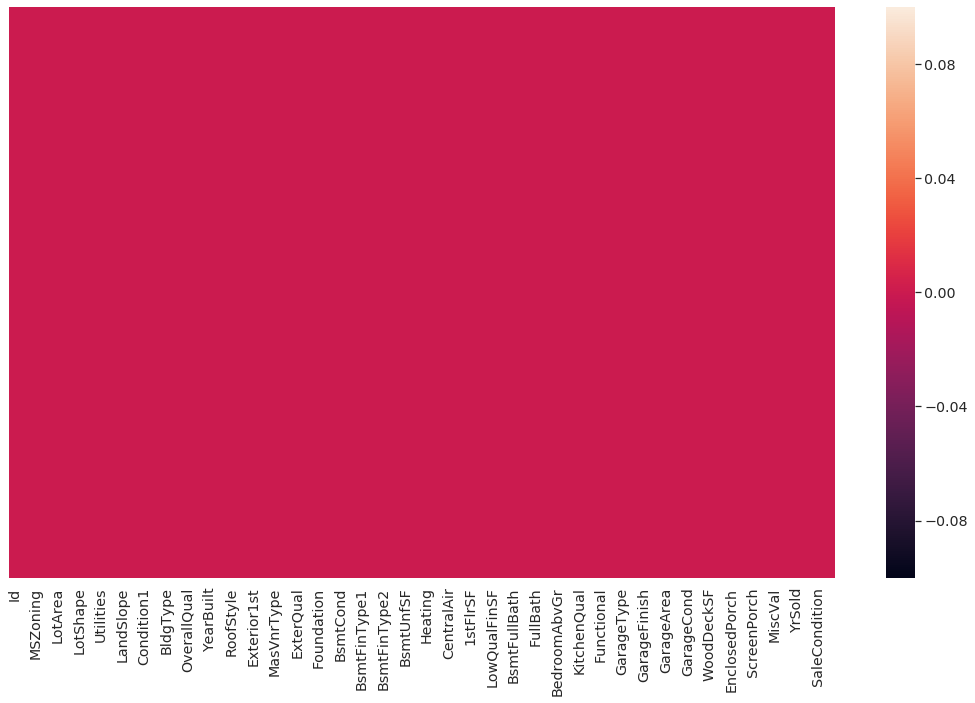

In [168]:
#Checking the heatmap for null values
sns.heatmap(df.isnull(), yticklabels=False)
plt.show()

In [169]:
df.isnull().sum(axis=0).sort_values(ascending=False)

SalePrice        0
ExterCond        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
SaleCondition    0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
GarageYrBlt      0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal     

In [170]:
#check df['TotalBsmtSF'] == df['BsmtFinSF1'] + ['BsmtFinSF2'] + ['BsmtUnfSF']

df.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

df['TotHouseSF'] = df['1stFlrSF'] + df['2ndFlrSF']

df.drop(['1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

df.BsmtHalfBath.replace([1], [0.5], inplace=True)
df.HalfBath.replace([1], [0.5], inplace=True)

df['TotBath'] = df['BsmtHalfBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['FullBath']

df['BathBedroomRatio'] = df['TotBath'] // df['BedroomAbvGr']

df.drop(['BsmtHalfBath', 'HalfBath', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr'], axis=1, inplace=True)

df.drop(['Id'], axis=1, inplace=True)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotHouseSF,TotBath,BathBedroomRatio
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,1710,3.5,1.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,1262,2.5,0.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,1786,3.5,1.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,1717,2.0,0.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,2198,3.5,0.0


<a id = Section5></a>
## 5. Exploratory Data Analysis

<a id = Section51></a>
### 5.1 Origin place of coronavirus

In [172]:
cor = df.corr(method ='kendall')
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,LowQualFinSF,GrLivArea,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotHouseSF,TotBath,BathBedroomRatio
MSSubClass,1.000000,-0.203231,-0.200790,0.083506,-0.057833,0.010922,-0.003649,0.017300,-0.234613,0.066860,0.141142,0.244957,0.133565,0.016988,0.054836,0.019290,-0.035341,0.018110,0.025413,0.010590,-0.031583,-0.018751,0.029447,-0.028830,0.014059,-0.021802,-0.003979,0.138030,0.149213,0.106962
LotFrontage,-0.203231,1.000000,0.433202,0.188324,-0.059658,0.138359,0.074743,0.196900,0.252180,-0.027237,0.238038,-0.009378,0.246403,0.190236,0.069691,0.270931,0.248078,0.080046,0.119062,-0.079361,0.042102,0.032834,0.065509,0.017484,0.015764,0.005084,0.279285,0.240538,0.172921,-0.051936
LotArea,-0.200790,0.433202,1.000000,0.173136,-0.036164,0.074436,0.053329,0.132025,0.252669,-0.016481,0.304676,-0.018601,0.303366,0.279682,0.027738,0.264666,0.247904,0.133455,0.126485,-0.051719,0.050724,0.074070,0.068907,0.048161,0.004481,-0.020255,0.314174,0.306561,0.207062,-0.047425
OverallQual,0.083506,0.188324,0.173136,1.000000,-0.152513,0.505804,0.437687,0.341688,0.349043,-0.030355,0.464189,-0.171960,0.351349,0.365010,0.448339,0.543120,0.424225,0.209439,0.346309,-0.139530,0.029395,0.040856,0.050609,-0.078040,0.047233,-0.020327,0.669660,0.467961,0.454074,0.216501
OverallCond,-0.057833,-0.059658,-0.036164,-0.152513,1.000000,-0.329379,-0.031641,-0.150842,-0.168321,0.036670,-0.118681,-0.092452,-0.087672,-0.040712,-0.280853,-0.226809,-0.156301,-0.035247,-0.107522,0.097942,0.029930,0.068009,-0.005175,0.079860,-0.005585,0.042257,-0.103492,-0.118617,-0.186523,-0.160165
YearBuilt,0.010922,0.138359,0.074436,0.505804,-0.329379,1.000000,0.624893,0.301035,0.296103,-0.119523,0.191389,-0.128044,0.130910,0.137551,0.780321,0.491814,0.381106,0.204089,0.284283,-0.324028,0.018436,-0.058717,0.007335,-0.075164,0.012968,-0.009402,0.470960,0.198215,0.409774,0.278809
YearRemodAdd,-0.003649,0.074743,0.053329,0.437687,-0.031641,0.624893,1.000000,0.177590,0.208188,-0.053443,0.189392,-0.128114,0.146455,0.095041,0.610826,0.371014,0.282788,0.165740,0.255900,-0.187786,0.042759,-0.037362,0.002328,-0.074961,0.015121,0.034830,0.412955,0.194240,0.304853,0.224557
MasVnrArea,0.017300,0.196900,0.132025,0.341688,-0.150842,0.301035,0.177590,1.000000,0.272508,-0.096384,0.245238,-0.042903,0.216156,0.222889,0.221484,0.347481,0.276907,0.142672,0.168262,-0.155597,0.036274,0.032832,0.004054,-0.045605,0.014109,0.000792,0.322192,0.249763,0.277582,0.130778
TotalBsmtSF,-0.234613,0.252180,0.252669,0.349043,-0.168321,0.296103,0.208188,0.272508,1.000000,-0.065888,0.295670,-0.020285,0.176370,0.258697,0.218261,0.360675,0.338118,0.168592,0.194711,-0.135576,0.040055,0.071340,0.038438,-0.049690,0.021118,-0.012307,0.435018,0.299881,0.283373,0.198192
LowQualFinSF,0.066860,-0.027237,-0.016481,-0.030355,0.036670,-0.119523,-0.053443,-0.096384,-0.065888,1.000000,0.051876,-0.003985,0.037425,-0.042248,-0.019150,-0.069998,-0.039248,-0.037287,0.009055,0.045722,0.022246,-0.018165,0.065331,0.028750,-0.003055,-0.031635,-0.055308,0.000670,-0.038393,-0.031429


In [201]:
cor_target = cor["SalePrice"]
irrelevant_features = cor_target[(cor_target > 0)]
irrelevant_features = irrelevant_features[(cor_target < .50)]
irrelevant_features

LotFrontage         0.279285
LotArea             0.314174
YearBuilt           0.470960
YearRemodAdd        0.412955
MasVnrArea          0.322192
TotalBsmtSF         0.435018
TotRmsAbvGrd        0.410168
Fireplaces          0.412829
GarageYrBlt         0.393364
GarageArea          0.478146
WoodDeckSF          0.260349
OpenPorchSF         0.350161
3SsnPorch           0.053478
ScreenPorch         0.080654
PoolArea            0.047800
MoSold              0.049471
BathBedroomRatio    0.223895
Name: SalePrice, dtype: float64

In [202]:
df.drop(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 
         'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 
         'ScreenPorch', 'PoolArea', 'MoSold', 'BathBedroomRatio'], axis=1, inplace=True)
df.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,KitchenAbvGr,KitchenQual,Functional,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,EnclosedPorch,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,TotHouseSF,TotBath
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,1710,1,Gd,Typ,Attchd,RFn,2,TA,TA,Y,0,0,2008,WD,Normal,208500,1710,3.5
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1262,1,TA,Typ,Attchd,RFn,2,TA,TA,Y,0,0,2007,WD,Normal,181500,1262,2.5
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,0,1786,1,Gd,Typ,Attchd,RFn,2,TA,TA,Y,0,0,2008,WD,Normal,223500,1786,3.5
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,0,1717,1,Gd,Typ,Detchd,Unf,3,TA,TA,Y,272,0,2006,WD,Abnorml,140000,1717,2.0
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,0,2198,1,Gd,Typ,Attchd,RFn,3,TA,TA,Y,0,0,2008,WD,Normal,250000,2198,3.5


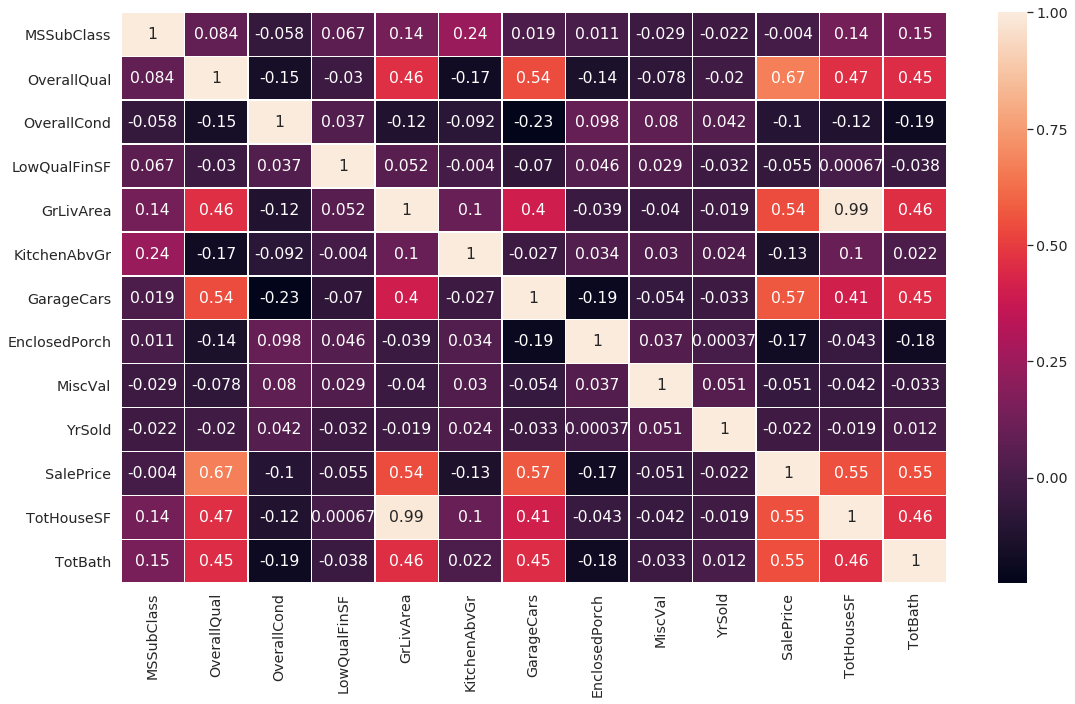

In [203]:
sns.heatmap(df.corr(method ='kendall'), annot=True, linewidths=.5)

# Creating dummies
### The get_dummies() function is used to convert categorical variable into dummy/indicator variables.

In [167]:
dummy_values = pd.concat([pd.get_dummies(df.MSZoning, drop_first=True), 
                         pd.get_dummies(df.Street, drop_first=True),
                         pd.get_dummies(df.LotShape, drop_first=True),
                         pd.get_dummies(df.LandContour, drop_first=True),
                         pd.get_dummies(df.Utilities, drop_first=True),
                         pd.get_dummies(df.LotConfig, drop_first=True),
                         pd.get_dummies(df.LandSlope, drop_first=True),
                         pd.get_dummies(df.Neighborhood, drop_first=True),
                         pd.get_dummies(df.Condition1, drop_first=True),
                         pd.get_dummies(df.BldgType, drop_first=True),
                         pd.get_dummies(df.Condition2, drop_first=True),
                         pd.get_dummies(df.HouseStyle, drop_first=True),
                         pd.get_dummies(df.SaleType, drop_first=True),
                         pd.get_dummies(df.SaleCondition, drop_first=True),
                         pd.get_dummies(df.ExterCond, drop_first=True),
                         pd.get_dummies(df.ExterQual, drop_first=True),
                         pd.get_dummies(df.Foundation, drop_first=True),
                         pd.get_dummies(df.BsmtQual, drop_first=True),
                         pd.get_dummies(df.BsmtCond, drop_first=True),
                         pd.get_dummies(df.BsmtExposure, drop_first=True),
                         pd.get_dummies(df.BsmtFinType1, drop_first=True),
                         pd.get_dummies(df.BsmtFinType2, drop_first=True),
                         pd.get_dummies(df.RoofStyle, drop_first=True),
                         pd.get_dummies(df.RoofMatl, drop_first=True),
                         pd.get_dummies(df.Exterior1st, drop_first=True),
                         pd.get_dummies(df.Exterior2nd, drop_first=True),
                         pd.get_dummies(df.MasVnrType, drop_first=True),
                         pd.get_dummies(df.Heating, drop_first=True),
                         pd.get_dummies(df.HeatingQC, drop_first=True),
                         pd.get_dummies(df.CentralAir, drop_first=True),
                         pd.get_dummies(df.Electrical, drop_first=True),
                         pd.get_dummies(df.KitchenQual, drop_first=True),
                         pd.get_dummies(df.Functional, drop_first=True),
                         pd.get_dummies(df.GarageType, drop_first=True),
                         pd.get_dummies(df.GarageFinish, drop_first=True),
                         pd.get_dummies(df.GarageQual, drop_first=True),
                         pd.get_dummies(df.GarageCond, drop_first=True),
                         pd.get_dummies(df.PavedDrive, drop_first=True)], axis=1)

df = pd.concat([df, dummy_values], axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,GasA,GasW,Grav,OthW,Wall,Fa,Gd,Po,TA,Y,FuseF,FuseP,Mix,SBrkr,Fa,Gd,TA,Maj2,Min1,Min2,Mod,Sev,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,Fin,RFn,Unf,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,...,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,...,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,...,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,...,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1


In [168]:
#dropping unnecssary columns
df.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
            'Condition2', 'BldgType', 'Condition1', 'HouseStyle', 'SaleType', 'SaleCondition', 'ExterCond', 
         'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'RoofStyle', 
         'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Heating', 'HeatingQC', 'CentralAir', 
         'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
         'PavedDrive','Foundation'], axis=1, inplace=True)

df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,...,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,GasA,GasW,Grav,OthW,Wall,Fa,Gd,Po,TA,Y,FuseF,FuseP,Mix,SBrkr,Fa,Gd,TA,Maj2,Min1,Min2,Mod,Sev,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,Fin,RFn,Unf,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
